###  MicroGrad demo

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [3]:
np.random.seed(1337)
random.seed(1337)

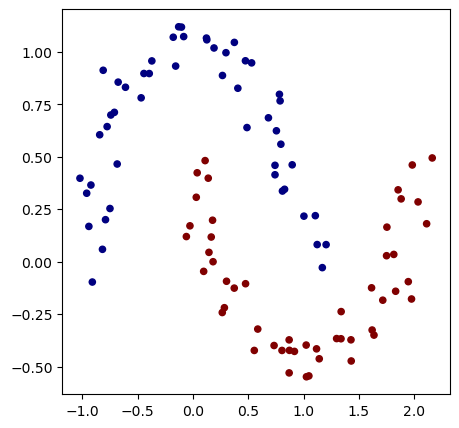

In [4]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [5]:
X

array([[ 1.12211461e+00,  8.14771734e-02],
       [-8.18829413e-01,  5.87900639e-02],
       [ 1.61370966e+00, -1.24645900e-01],
       [-9.23009184e-01,  3.65228899e-01],
       [ 1.43851462e-01,  4.43800492e-02],
       [ 1.64472466e-01,  1.17383457e-01],
       [ 1.33877062e+00, -2.38009933e-01],
       [ 8.71148615e-01, -4.22717587e-01],
       [ 1.83129946e+00, -1.41043828e-01],
       [ 4.87571202e-01,  6.39092830e-01],
       [ 3.74623511e-02,  4.23588090e-01],
       [-4.43916853e-01,  8.96739312e-01],
       [-8.12229494e-01,  9.12090924e-01],
       [ 1.63552312e+00, -3.49996760e-01],
       [ 4.73539037e-01,  9.57342599e-01],
       [ 7.53549316e-01,  6.23727143e-01],
       [ 2.64212818e-01, -2.42419828e-01],
       [ 1.42755726e+00, -3.72510358e-01],
       [-3.72356057e-01,  9.56691710e-01],
       [-9.61301967e-01,  3.26090112e-01],
       [ 7.80858468e-01,  7.97489402e-01],
       [ 9.16609029e-01, -4.27638438e-01],
       [ 1.04703809e+00, -5.44492470e-01],
       [-6.

In [6]:
y

array([-1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1,
        1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,
        1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,
        1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,
        1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
       -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1])

In [6]:
# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16)]]
number of parameters 337


In [7]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=0.8958441028683222, grad=0) 0.5


In [8]:
# optimization
for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")


step 0 loss 0.8958441028683222, accuracy 50.0%
step 1 loss 1.7235905336972022, accuracy 81.0%
step 2 loss 0.742900631385113, accuracy 77.0%
step 3 loss 0.7705641260584198, accuracy 82.0%
step 4 loss 0.3692793385976538, accuracy 84.0%
step 5 loss 0.31354548191852205, accuracy 86.0%
step 6 loss 0.2814234349772435, accuracy 89.0%
step 7 loss 0.26888733313983904, accuracy 91.0%
step 8 loss 0.2567147286057416, accuracy 91.0%
step 9 loss 0.2704862551637922, accuracy 91.0%
step 10 loss 0.24507023853658041, accuracy 91.0%
step 11 loss 0.25099055297915035, accuracy 92.0%
step 12 loss 0.2156095185192295, accuracy 91.0%
step 13 loss 0.23090378446402726, accuracy 93.0%
step 14 loss 0.20152151227899445, accuracy 92.0%
step 15 loss 0.22574506279282228, accuracy 93.0%
step 16 loss 0.19447987596204105, accuracy 92.0%
step 17 loss 0.21089496199246363, accuracy 93.0%
step 18 loss 0.15983077356303602, accuracy 94.0%
step 19 loss 0.18453748746883916, accuracy 93.0%
step 20 loss 0.18977522856087645, accura

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x10602cf50>>
Traceback (most recent call last):
  File "/nix/store/4x8i1pm28iqqxi03ii1146dpkj5wpdhy-python3.11-ipykernel-6.29.4/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


step 30 loss 0.11731297569011846, accuracy 95.0%
step 31 loss 0.09340146460619841, accuracy 97.0%
step 32 loss 0.1245445490310345, accuracy 95.0%
step 33 loss 0.07984002652777271, accuracy 97.0%
step 34 loss 0.07727519232921674, accuracy 97.0%
step 35 loss 0.07661250143094481, accuracy 98.0%
step 36 loss 0.10610492379198366, accuracy 96.0%
step 37 loss 0.09062808429265976, accuracy 99.0%
step 38 loss 0.1067188704303693, accuracy 95.0%
step 39 loss 0.05225659921975848, accuracy 98.0%
step 40 loss 0.060160098952344636, accuracy 100.0%
step 41 loss 0.08596724533333942, accuracy 96.0%
step 42 loss 0.05112107943179598, accuracy 99.0%
step 43 loss 0.052401424016428326, accuracy 97.0%
step 44 loss 0.04530684179001572, accuracy 100.0%
step 45 loss 0.07211073370655097, accuracy 97.0%


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x10602cf50>>
Traceback (most recent call last):
  File "/nix/store/4x8i1pm28iqqxi03ii1146dpkj5wpdhy-python3.11-ipykernel-6.29.4/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


step 46 loss 0.033342386513102354, accuracy 99.0%
step 47 loss 0.03143222795751124, accuracy 100.0%
step 48 loss 0.03658536747111507, accuracy 99.0%
step 49 loss 0.048291393823903093, accuracy 99.0%
step 50 loss 0.09875114765619622, accuracy 96.0%
step 51 loss 0.05449063965875452, accuracy 99.0%
step 52 loss 0.03392679435708314, accuracy 100.0%
step 53 loss 0.0526151726356844, accuracy 97.0%
step 54 loss 0.03250295251424923, accuracy 99.0%
step 55 loss 0.028883273872078268, accuracy 100.0%
step 56 loss 0.041391511040272375, accuracy 98.0%
step 57 loss 0.01898740742612852, accuracy 100.0%


(-1.548639298268643, 1.951360701731357)

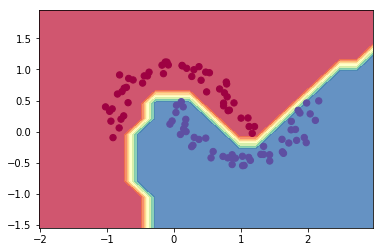

In [ ]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
